In [67]:
import tensorflow
import gym
import gym_anytrading
from stable_baselines3 import A2C
from stable_baselines3.common.vec_env import DummyVecEnv
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [68]:
key_id = 'PK04UHV69AF2QULV4REU'
secret_key = '7g1qUN7qjsfW3U6oSccYYtHyQdoewJ12ANDQmSKd'
endpoint = 'https://paper-api.alpaca.markets'

In [69]:
# connect to alpaca api
from alpaca.data.historical import StockHistoricalDataClient
from alpaca.data.requests import StockBarsRequest
from alpaca.data.timeframe import TimeFrame
from datetime import datetime


stock_client = StockHistoricalDataClient(key_id, secret_key)

# get 1 years worth data on Nvidia by the day. Could also use TimeFrame.Minute for daily data
request_params = StockBarsRequest(symbol_or_symbols=['NVDA'],
                                  timeframe=TimeFrame.Day,
                                  start=datetime(2020, 1, 1),
                                  end=datetime(2022, 1, 1)
                                  )

bars = stock_client.get_stock_bars(request_params)


In [70]:
data=bars.df.reset_index()
data.head()
df=data.iloc[:,1:]
df.head()

,timestamp,open,high,low,close,volume,trade_count,vwap
0,2020-01-02 05:00:00+00:00,238.85,239.91,236.720,239.91,5941969.0,67912.0,238.723319
1,2020-01-03 05:00:00+00:00,235.00,237.83,234.100,236.07,5145208.0,63605.0,236.384392
2,2020-01-06 05:00:00+00:00,232.36,237.27,231.270,237.06,6572812.0,73912.0,235.468778
3,2020-01-07 05:00:00+00:00,238.20,241.77,236.390,239.93,7980144.0,81624.0,239.855220
4,2020-01-08 05:00:00+00:00,239.76,242.04,238.149,240.38,6931017.0,70240.0,240.313148


In [71]:
df.dtypes

timestamp      datetime64[ns, UTC]
open                       float64
high                       float64
low                        float64
close                      float64
volume                     float64
trade_count                float64
vwap                       float64
dtype: object

In [83]:
from numpy import column_stack


df.rename(columns={"timestamp":"Date","close":'Close'},inplace=True)
df=df.iloc[:,:-2]
df.head(5)

,Date,open,high,low,Close,volume
0,2020-01-02 05:00:00+00:00,238.85,239.91,236.720,239.91,5941969.0
1,2020-01-03 05:00:00+00:00,235.00,237.83,234.100,236.07,5145208.0
2,2020-01-06 05:00:00+00:00,232.36,237.27,231.270,237.06,6572812.0
3,2020-01-07 05:00:00+00:00,238.20,241.77,236.390,239.93,7980144.0
4,2020-01-08 05:00:00+00:00,239.76,242.04,238.149,240.38,6931017.0


In [84]:
env = gym.make('stocks-v0',df=df,frame_bound=(10,100),window_size=5)
#env = gym.make('stocks-v0',frame_bound=(10,100),window_size=5)

In [85]:
env.signal_features

array([[ 2.43020e+02,  0.00000e+00],
       [ 2.44320e+02,  1.30000e+00],
       [ 2.51980e+02,  7.66000e+00],
       [ 2.47280e+02, -4.70000e+00],
       [ 2.45570e+02, -1.71000e+00],
       [ 2.48930e+02,  3.36000e+00],
       [ 2.49280e+02,  3.50000e-01],
       [ 2.47940e+02, -1.34000e+00],
       [ 2.50050e+02,  2.11000e+00],
       [ 2.52860e+02,  2.81000e+00],
       [ 2.50480e+02, -2.38000e+00],
       [ 2.40200e+02, -1.02800e+01],
       [ 2.47970e+02,  7.77000e+00],
       [ 2.45540e+02, -2.43000e+00],
       [ 2.45810e+02,  2.70000e-01],
       [ 2.36430e+02, -9.38000e+00],
       [ 2.40330e+02,  3.90000e+00],
       [ 2.47130e+02,  6.80000e+00],
       [ 2.50760e+02,  3.63000e+00],
       [ 2.54245e+02,  3.48500e+00],
       [ 2.51590e+02, -2.65500e+00],
       [ 2.62970e+02,  1.13800e+01],
       [ 2.67890e+02,  4.92000e+00],
       [ 2.72540e+02,  4.65000e+00],
       [ 2.70780e+02, -1.76000e+00],
       [ 2.89790e+02,  1.90100e+01],
       [ 2.96570e+02,  6.78000e+00],
 

In [86]:
env.prices

array([243.02 , 244.32 , 251.98 , 247.28 , 245.57 , 248.93 , 249.28 ,
       247.94 , 250.05 , 252.86 , 250.48 , 240.2  , 247.97 , 245.54 ,
       245.81 , 236.43 , 240.33 , 247.13 , 250.76 , 254.245, 251.59 ,
       262.97 , 267.89 , 272.54 , 270.78 , 289.79 , 296.57 , 314.7  ,
       308.7  , 294.07 , 273.28 , 262.05 , 267.65 , 252.6  , 270.07 ,
       276.43 , 265.89 , 284.51 , 273.29 , 266.04 , 245.44 , 261.08 ,
       246.47 , 216.31 , 240.84 , 196.4  , 217.27 , 202.82 , 212.97 ,
       205.75 , 212.69 , 249.18 , 245.62 , 257.24 , 252.73 , 265.59 ,
       263.6  , 243.07 , 255.47 , 243.91 , 268.4  , 259.03 , 266.95 ,
       262.95 , 269.85 , 283.95 , 280.84 , 294.7  , 292.32 , 287.05 ,
       269.51 , 286.15 , 284.01 , 289.59 , 297.08 , 291.36 , 298.46 ,
       292.28 , 282.78 , 291.285, 293.74 , 297.79 , 304.87 , 312.5  ,
       322.62 , 312.1  , 311.2  , 321.22 , 339.63 , 350.01 , 352.22 ,
       358.8  , 351.01 , 361.05 , 348.71 ])

info: {'total_reward': 68.74500000000015, 'total_profit': 0.9045450724485858, 'position': 1}


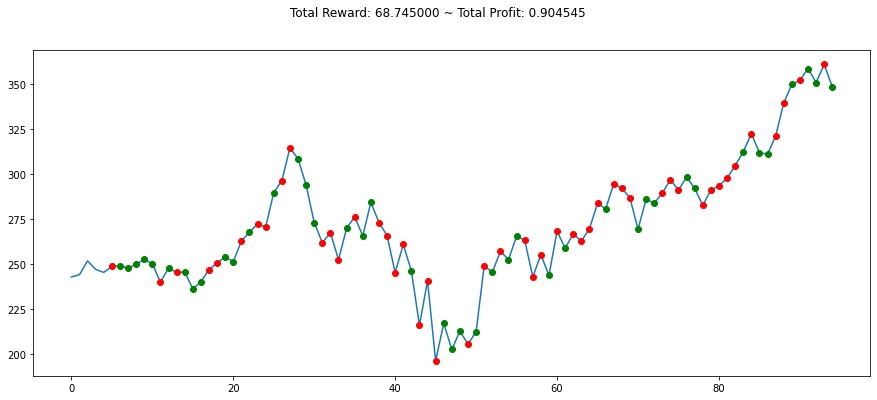

In [87]:
#Build Environment
state = env.reset()
while True:
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    # env.render()
    if done:
        print("info:", info)
        break

plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [88]:
#Build environment and Train

env_maker = lambda: gym.make('stocks-v0',df=df,frame_bound=(5,100),window_size=5)
env = DummyVecEnv([env_maker])


In [90]:
model = A2C('MlpPolicy',env,verbose=1)
model.learn(total_timesteps=100000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 23.6     |
| time/                 |          |
|    fps                | 2514     |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.686   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 2.37     |
|    value_loss         | 17.2     |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 24.8     |
| time/                 |          |
|    fps                | 2611     |
|    iterations         | 200      |
|    time_elapsed 

In [102]:
env = gym.make('stocks-v0',df=df,frame_bound=(90,110),window_size=5)
observation = env.reset()
while True:
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    # env.render()
    if done:
        print("info:", info)
        break

info: {'total_reward': 17.370000000000005, 'total_profit': 0.9771899597921675, 'position': 0}


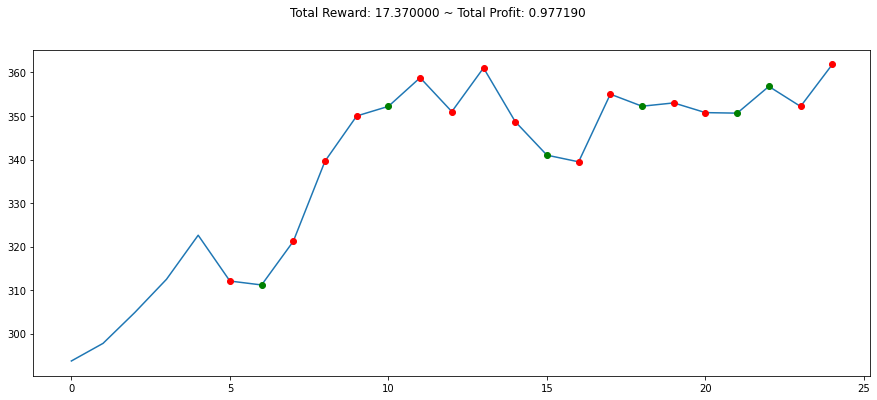

In [103]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()